<a href="https://colab.research.google.com/github/ozcannrabia/feature-engineering/blob/main/encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Label Encoding

In [ ]:
# kategorik değişkenleri 0, 1, 2 gibi numerik ifadelere dönüştürme işlemidir
# sınıflar arası sıralama varsa kullanılabilir
# sınıflar ordinal değilse kullanılması çok tercih edilmez

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve
from xgboost import XGBClassifier

In [ ]:
def load():
  df = pd.read_csv("titanic.csv")
  return df
df = load()
df["Sex"].head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
le = LabelEncoder()
le.fit_transform(df["Sex"])[0:5]

array([1, 0, 0, 0, 1])

In [ ]:
le.inverse_transform([0, 1])
# inverse eski sınıfları tutar hangisi 1 hangisi 0 onu gösterebilir

array(['female', 'male'], dtype=object)

In [ ]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
# eşsiz sınıf sayısı 2 olan değişkenleri seç

In [ ]:
for col in binary_cols:
  label_encoder(df, col)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


One Hot Encoding

In [ ]:
# sınıflar arası fark yoksa kullanılır
# sadece veri setinde ağırlık vermek için o değişkene 1, diğerlerine o verilir


In [ ]:
df = load()
df["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
pd.get_dummies(df, columns=["Embarked"], dtype = "int").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [ ]:
pd.get_dummies(df, columns=["Embarked"], drop_first=True, dtype = "int").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


In [ ]:
pd.get_dummies(df, columns=["Embarked"], dummy_na=True, dtype = "int").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1,0


In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True, dtype="int"):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype=dtype)
  return dataframe

In [ ]:
# veri tiplerini belirleme
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f'num_cols: {len(num_cols)}')
  print(f'cat_but_car: {len(cat_but_car)}')
  print(f'num_but_cat: {len(num_but_cat)}')
  return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [ ]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
one_hot_encoder(df, ohe_cols, dtype="int").head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1


Rare Encoding

In [ ]:
# frekans sayılarına göre eşik değer belirleyip onun altında kalan değişkenleri bir araya toplayıp 1 sınıf gibi davranır

In [ ]:
def load_app():
  df = pd.read_csv("application_train.csv")
  return df
df = load_app()
df["NAME_EDUCATION_TYPE"].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,33120
Higher education,11370
Incomplete higher,1508
Lower secondary,573
Academic degree,20
Secondary,1


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols

Observations: 46592
Variables: 122
cat_cols: 56
num_cols: 65
cat_but_car: 1
num_but_cat: 41


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 '

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name], data = dataframe)
    plt.show()

# cat değişkenlerin bilgileri

In [ ]:
for col in cat_cols:
  cat_summary(df, col)

                    NAME_CONTRACT_TYPE      Ratio
NAME_CONTRACT_TYPE                               
Cash loans                       42211  90.597098
Revolving loans                   4381   9.402902
##########################################
             CODE_GENDER      Ratio
CODE_GENDER                        
F                  30589  65.652902
M                  16001  34.342806
XNA                    2   0.004293
##########################################
              FLAG_OWN_CAR      Ratio
FLAG_OWN_CAR                         
N                    30694  65.878262
Y                    15898  34.121738
##########################################
                 FLAG_OWN_REALTY      Ratio
FLAG_OWN_REALTY                            
Y                          32336  69.402473
N                          14256  30.597527
##########################################
                 NAME_TYPE_SUITE      Ratio
NAME_TYPE_SUITE                            
Unaccompanied              37656

In [ ]:
# target a göre analiz
df.groupby("NAME_INCOME_TYPE")["TARGET"].mean()

,TARGET
NAME_INCOME_TYPE,
Businessman,0.000000
Commercial associate,0.074740
Pensioner,0.056676
State servant,0.055811
Student,0.000000
Unemployed,0.333333
Working,0.094597


In [ ]:
def rare_analyser(dataframe, target, cat_cols):
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                        "RATIO": dataframe[col].value_counts() / len(dataframe),
                        "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

# tüm cat değişkenlerin target ile analizi

In [ ]:
rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                    COUNT     RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                              
Cash loans          42211  0.905971     0.083817
Revolving loans      4381  0.094029     0.048847


CODE_GENDER : 3
             COUNT     RATIO  TARGET_MEAN
CODE_GENDER                              
F            30589  0.656529     0.069143
M            16001  0.343428     0.102306
XNA              2  0.000043     0.000000


FLAG_OWN_CAR : 2
              COUNT     RATIO  TARGET_MEAN
FLAG_OWN_CAR                              
N             30694  0.658783     0.084446
Y             15898  0.341217     0.072965


FLAG_OWN_REALTY : 2
                 COUNT     RATIO  TARGET_MEAN
FLAG_OWN_REALTY                              
N                14256  0.305975     0.082702
Y                32336  0.694025     0.079571


NAME_TYPE_SUITE : 7
                 COUNT     RATIO  TARGET_MEAN
NAME_TYPE_SUITE                              
Children           507  0.010882     0.084

Rare Encoder Fonksiyonu

In [ ]:
def rare_encoder(dataframe, rare_perc):
  temp_df = dataframe.copy()

  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == "O"
                  and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_perc].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

  return temp_df

# belli oran (rare_perc) altında kalan kolonları bir araya getirecek

In [ ]:
new_df = rare_encoder(df, 0.01)
rare_analyser(new_df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                    COUNT     RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                              
Cash loans          42211  0.905971     0.083817
Revolving loans      4381  0.094029     0.048847


CODE_GENDER : 3
             COUNT     RATIO  TARGET_MEAN
CODE_GENDER                              
F            30589  0.656529     0.069143
M            16001  0.343428     0.102306
Rare             2  0.000043     0.000000


FLAG_OWN_CAR : 2
              COUNT     RATIO  TARGET_MEAN
FLAG_OWN_CAR                              
N             30694  0.658783     0.084446
Y             15898  0.341217     0.072965


FLAG_OWN_REALTY : 2
                 COUNT     RATIO  TARGET_MEAN
FLAG_OWN_REALTY                              
N                14256  0.305975     0.082702
Y                32336  0.694025     0.079571


NAME_TYPE_SUITE : 5
                 COUNT     RATIO  TARGET_MEAN
NAME_TYPE_SUITE                              
Children           507  0.010882     0.084

Özellik Ölçeklendirme -> Feature Scaling

In [ ]:
# değişkenler arası farklılığı gidermek
# modellerin değişkenlere eşit şartlarda yaklaşmasını sağlamak

StandardScaler

In [ ]:
df = load()
ss = StandardScaler()
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167


RobustScaler

In [ ]:
rs = RobustScaler()
df["Age_robust_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_standard_scaler,714.0,2.388379e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
Age_robust_scaler,714.0,9.505553e-02,0.812671,-1.542937,-0.440559,0.000000,0.559441,2.909091


MinMaxScaler

In [ ]:
mms = MinMaxScaler()
df["Age_minmax_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.0,2.969912e+01,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_standard_scaler,714.0,2.388379e-16,1.000701,-2.016979,-0.659542,-0.117049,0.571831,3.465126
Age_robust_scaler,714.0,9.505553e-02,0.812671,-1.542937,-0.440559,0.000000,0.559441,2.909091
Age_minmax_scaler,714.0,3.679206e-01,0.182540,0.000000,0.247612,0.346569,0.472229,1.000000


In [ ]:
age_cols = [col for col in df.columns if "Age" in col]

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
  quantiles=[0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)

  if plot:
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show()

# numeric kolonların bilgileri

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: Age, dtype: float64


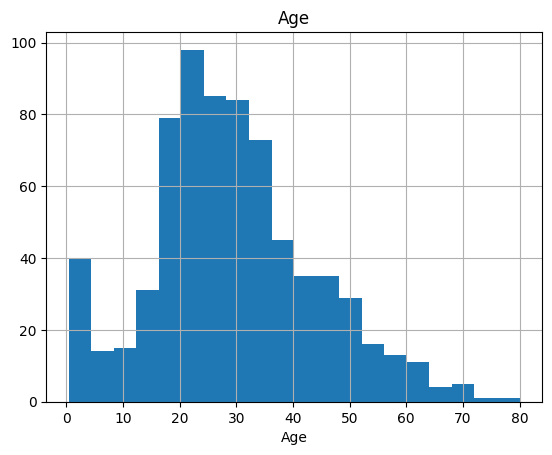

count    7.140000e+02
mean     2.388379e-16
std      1.000701e+00
min     -2.016979e+00
5%      -1.770360e+00
10%     -1.081480e+00
20%     -7.370406e-01
30%     -5.303766e-01
40%     -3.237127e-01
50%     -1.170488e-01
60%      1.447255e-01
70%      4.340550e-01
80%      7.784949e-01
90%      1.398487e+00
95%      1.811815e+00
99%      2.491739e+00
max      3.465126e+00
Name: Age_standard_scaler, dtype: float64


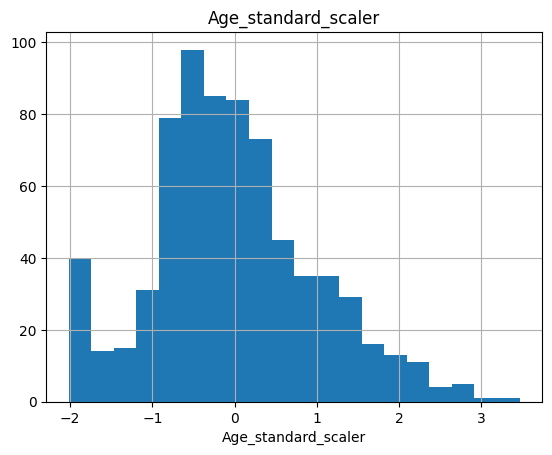

count    714.000000
mean       0.095056
std        0.812671
min       -1.542937
5%        -1.342657
10%       -0.783217
20%       -0.503497
30%       -0.335664
40%       -0.167832
50%        0.000000
60%        0.212587
70%        0.447552
80%        0.727273
90%        1.230769
95%        1.566434
99%        2.118601
max        2.909091
Name: Age_robust_scaler, dtype: float64


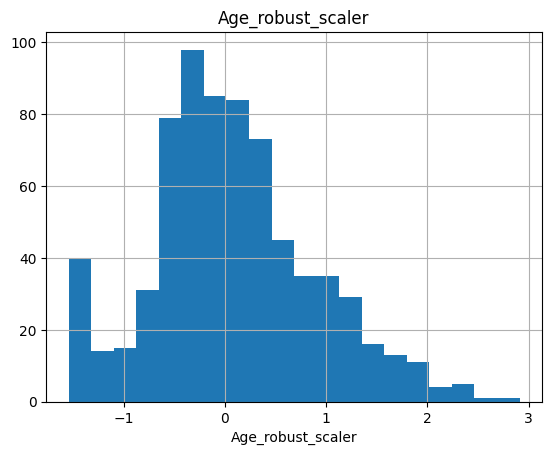

count    714.000000
mean       0.367921
std        0.182540
min        0.000000
5%         0.044986
10%        0.170646
20%        0.233476
30%        0.271174
40%        0.308872
50%        0.346569
60%        0.394320
70%        0.447097
80%        0.509927
90%        0.623021
95%        0.698417
99%        0.822443
max        1.000000
Name: Age_minmax_scaler, dtype: float64


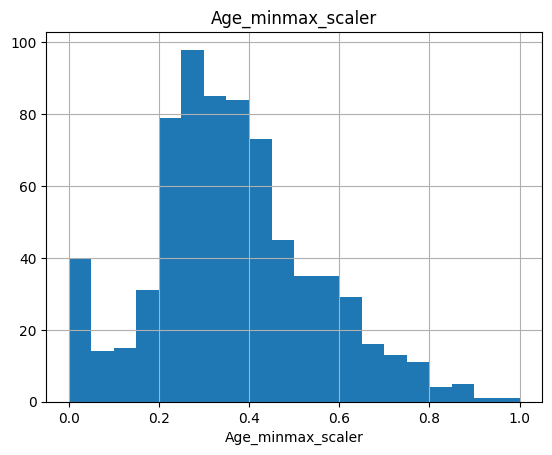

In [ ]:
for col in age_cols:
  num_summary(df, col, plot=True)

Sayısal Değişkenleri Kategorik Değişkenlere Çevirme

In [ ]:
df["Age_qcut"] = pd.qcut(df["Age"], 5)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robust_scaler,Age_minmax_scaler,Age_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.530377,-0.335664,0.271174,"(19.0, 25.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.571831,0.559441,0.472229,"(31.8, 41.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.254825,-0.111888,0.321438,"(25.0, 31.8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.365167,0.391608,0.434531,"(31.8, 41.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.365167,0.391608,0.434531,"(31.8, 41.0]"
